In [14]:
import pandas as pd
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# read hdf file and check names of keys
fl = h5py.File('./data/singlecoil_test/file1000036.h5')

In [19]:
list(fl.keys())

['ismrmrd_header', 'kspace', 'mask']

In [18]:
dict(fl.attrs)

{'acceleration': 8,
 'acquisition': 'CORPD_FBK',
 'num_low_frequency': 15,
 'patient_id': 'd26849b8d06d857a253661f2700cbee0fdc18f6d1f56a9dfe814abc7e4e93ea4'}

For single-coil MRIs, k-space has the following shape: (number of slices, height, width)

MRIs are acquired as 3D volumes, the first dimension is the number of 2D slices.

In [43]:
fl['ismrmrd_header'].shape

()

In [20]:
volume_kspace = fl['kspace'][()]
print(volume_kspace.shape)
print(volume_kspace.dtype)

(33, 640, 372)
complex64


In [24]:
slice_kspace = volume_kspace[20]

In [46]:
def show_coils(data, cmap=None):
    fig = plt.figure(figsize=(15, 7))
    #for i, num in enumerate(slice_nums):
    #    plt.subplot(1, len(slice_nums), i + 1)
    plt.imshow(data, cmap=cmap)

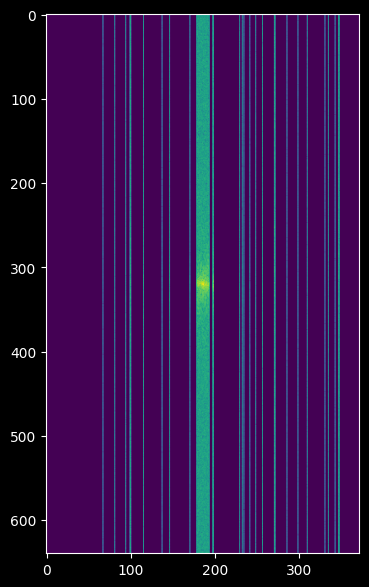

In [47]:
show_coils(np.log(np.abs(slice_kspace) + 1e-9))  # This shows coils 0, 5 and 10